# Dimensionality Reduction

## [ 차원 ]

### 1. 차원의 개념

* 차원 : 공간 내 데이터의 위치를 나타내기 위한 축의 개수
* n개의 설명 변수를 갖는다면 n차원에 나타낼 수 있음

* 차원의 저주 : 변수가 늘어서 차원이 커지게 되면 공간을 설명하기 위한 데이터의 부족(밀도 감소)
  * 각 변수가 가질 수 있는 값이 4개 일 때, 3차원만 되어도 64개의 데이터가 필요

### 2. 차원 축소

* 데이터를 잘 설명할 수 있는 변수의 개수(Latent Space)는 현재 변수의 개수(Observation Space)보다 작을 수 있음
* 데이터를 기반으로 잠재 공간을 파악하는 것

* 차원 축소의 효과 
  * 차원 저주 해결
  * 연산량 감소
  * 시각화 용이

* 차원 축소 방법
  * 변수 선택 : 원본 데이터에서 불필요한 변수 제거
  * 변수 추출 : 원본 데이터의 변수들을 조합해 새로운 변수를 생성
    * PCA(Principal Component Analysis), LDA(Linear Discriminatnt Analysis), t-SNE(t-distributed Stochastic Neighbor Embedding)

### 3. PCA

* 여러 변수의 정보를 담고 있는 `주성분`이라는 새로운 변수를 생성하는 차원 축소 기법
* 단순히 차원을 줄이기 보다는 관측된 차원이 아닌 실제 데이터를 설명하는 차원을 찾아 데이터를 더 잘 이해하고자 함
  * <img src="../Images/Machine_Learning/Dimensionality_Reduction_1.JPG" width="400" height="200" title=""/>
* 분산을 최대로 보존하는 `초평면`을 선택
  * 원본 데이터 셋과 투영된 초평면의 평균제곱거리를 최소화
  * 정보를 가장 적게 손실 => 한 축으로 합쳐지더라도 데이터가 구별되고 분산이 큼
  * 즉, 분산이 커서 각각의 데이터가 구별이 가능함
  * <img src="../Images/Machine_Learning/Dimensionality_Reduction_2.JPG" width="400" height="200" title=""/>

* 주성분
  * 분산을 가장 크게 하는 축이 `첫 번째 주성분`
  * 첫 번째 주성분에 `직교`하면서 남은 분산을 최대로 보존하는 두 번째 축이 `두 번째 주성분`

* 주성분 축을 찾는 방법
  * 데이터 표준화 => 표준화된 데이터가 더 잘 분류하기 때문
    * <img src="../Images/Machine_Learning/Dimensionality_Reduction_3.JPG" width="400" height="200" title=""/>
  * 공분산 행렬 생성
    * <img src="../Images/Machine_Learning/Dimensionality_Reduction_4.JPG" width="400" height="200" title=""/>
    * <img src="../Images/Machine_Learning/Dimensionality_Reduction_5.JPG" width="400" height="200" title=""/>
  * 고유값 분해 : 공분산 행렬이 다음과 같은 경우
    * <img src="../Images/Machine_Learning/Dimensionality_Reduction_6.JPG" width="400" height="200" title=""/>
    * 고유 벡터 계산 => 새로운 축
      * <img src="../Images/Machine_Learning/Dimensionality_Reduction_7.JPG" width="400" height="200" title=""/>
  * k개 벡터의 새로운 Basis => 몇 개의 축을 설정할 것인가
    * Scree plot : 고유값이 급격히 작아지는 구간(2)
    * Explained Variance Cutoff : 특정 기준의 설명 분산(0.9)에 해당하는 축(4)을 설정
    * <img src="../Images/Machine_Learning/Dimensionality_Reduction_8.JPG" width="600" height="400" title=""/>

* PCA 장단점
  * <img src="../Images/Machine_Learning/Dimensionality_Reduction_9.JPG" width="400" height="200" title=""/>

---

## [ 차원 축소 및 군집화 ]

### 1. Data

#### 1-1. Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

data, target = digits["data"], digits["target"]

In [3]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

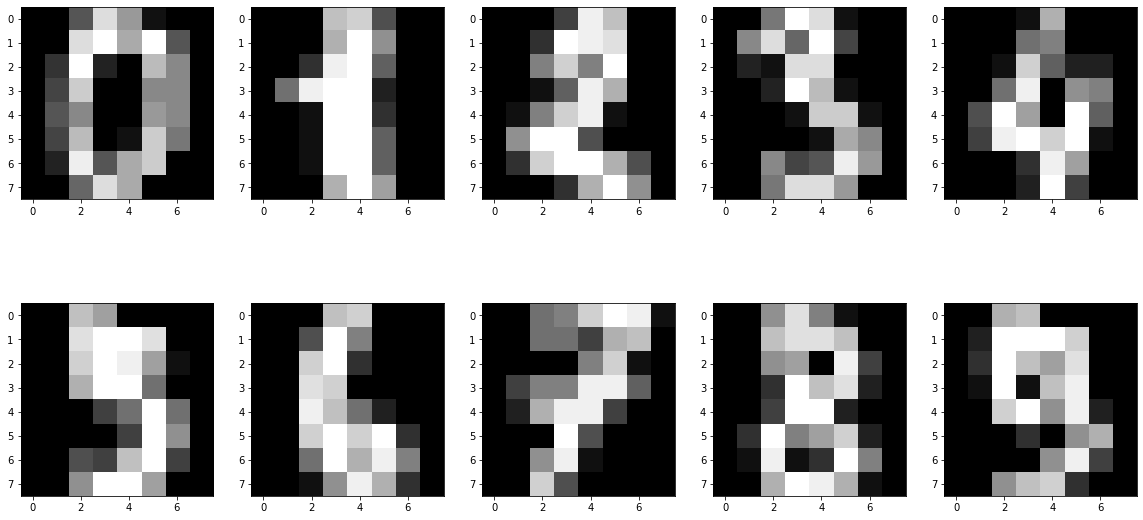

In [4]:
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

#### 1-2. 정규화

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

### 2. PCA

* 정규화된 데이터로 PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(scaled_data)

PCA()

* 첫 번째 주성분이 가장 크고 갈수록 작아짐

In [7]:
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

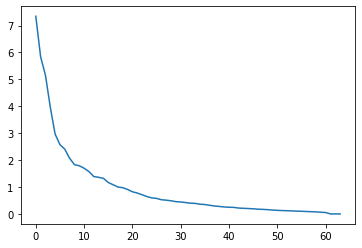

In [11]:
plt.plot(pca.explained_variance_)

* 설명된 분산을 비율로 표현 가능

In [12]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

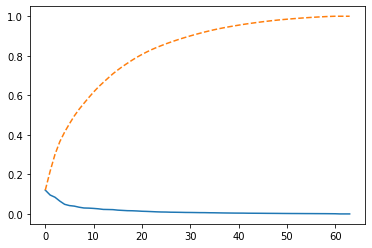

In [16]:
plt.plot(pca.explained_variance_ratio_) # 각각
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--") # 누적

### 3. 제한된 PCA

* 데이터의 모든 분산을 분리해서 사용
* 실제로 사용할 때는 개수를 지정하거나 설명되는 분산을 제한하는 방식으로 사용

#### 3-1. 비율로 사용하는 방법

* 0~1사이가 들어올 경우 설명된 분산이 해당 값에 도달할 때까지 주성분을 선택

In [17]:
ratio_pca = PCA(n_components=0.8) # 80% 설정
ratio_pca.fit(scaled_data)

PCA(n_components=0.8)

In [18]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [19]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

* 선택된 주성분 갯수

In [20]:
ratio_pca.n_components_

21

#### 3-2. 개수를 지정해 사용하는 방법

* int 값으로 1보다 큰 값을 줄 경우에는 지정된 개수만큼의 주성분을 계산

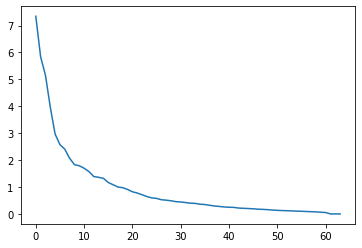

In [21]:
plt.plot(pca.explained_variance_)

In [22]:
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_data)

PCA(n_components=8)

In [23]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444414, 0.06498392, 0.04860127,
       0.04214067, 0.03941842, 0.03388898])

In [24]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.2159497 , 0.30039384, 0.36537776, 0.41397902,
       0.45611969, 0.49553812, 0.52942709])

In [25]:
n_comp_pca.n_components_

8

### 4. 시각화

* PCA를 이용해 데이터를 시각화 하는 방법
* 사람이 인식할 수 있는 차원의 크기는 최대 3차원 => 보통 2차원(주성분의 개수를 2개) 또는 3차원(주성분의 개수를 3개)으로 데이터를 축소한 후 시각화

In [26]:
viz_pca = PCA(n_components=2)
viz_pca_latent = viz_pca.fit_transform(scaled_data)

* 시각화 함수

In [27]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(target):
        index = target == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

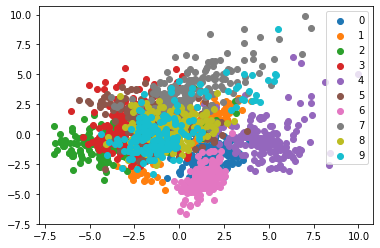

In [28]:
visualize_latent_space_with_label(viz_pca_latent)

### 5. LDA

* PCA와 유사, 학습에 label을 부여함

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(scaled_data, target)

LinearDiscriminantAnalysis()

In [30]:
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

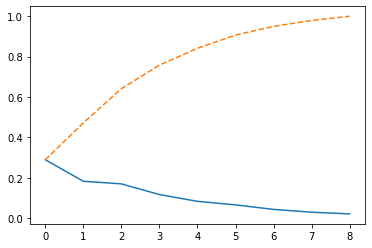

In [31]:
plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--")

In [32]:
viz_lda = LinearDiscriminantAnalysis(n_components=2)
viz_lda_latent = viz_lda.fit_transform(scaled_data, target)

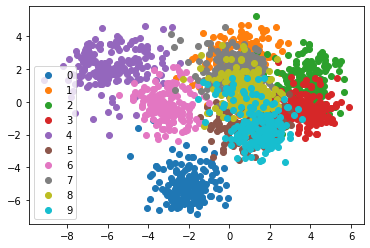

In [33]:
visualize_latent_space_with_label(viz_lda_latent)

### 6. t-SNE

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [35]:
tsne_latent = tsne.fit_transform(scaled_data)

C:\Users\jack0\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jack0\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


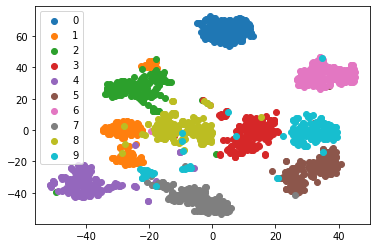

In [36]:
visualize_latent_space_with_label(tsne_latent)

### 7. PCA/LDA/t-SNE

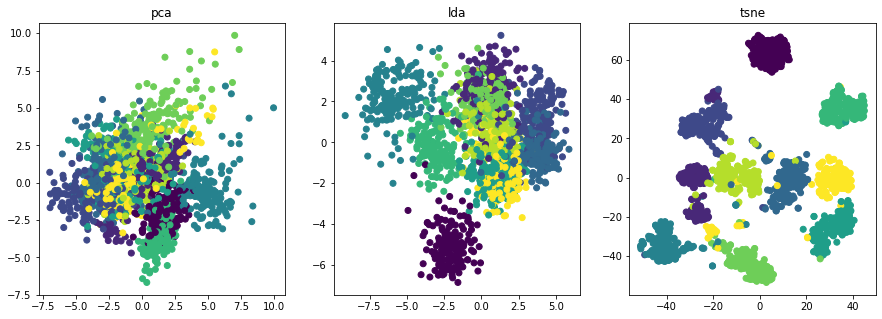

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
latents = [
    ("pca", viz_pca_latent),
    ("lda", viz_lda_latent),
    ("tsne", tsne_latent)
]
for idx, (name, latent) in enumerate(latents):
    ax = axes[idx]
    ax.scatter(latent[:, 0], latent[:, 1], c=target)
    ax.set_title(name)

### 8. 군집화

In [40]:
def visualize_latent_space_with_label_pred(latent, pred):
    for label in np.unique(pred):
        index = pred == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

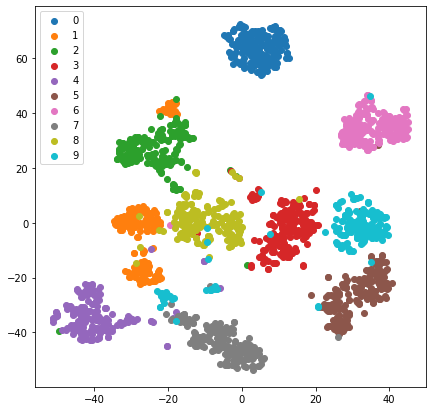

In [41]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label_pred(tsne_latent, target)

#### 8-1. 실제 정답인 k=10로 Clustering

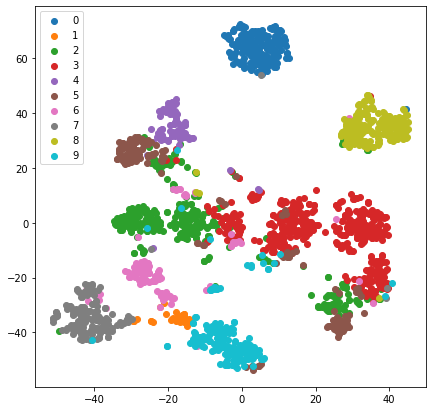

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

kmeans.fit(scaled_data)

pred = kmeans.predict(scaled_data)

plt.figure(figsize=(7, 7))
visualize_latent_space_with_label_pred(tsne_latent, pred)

#### 8-2. PCA + Clustering

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)

pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

In [44]:
pca_kmeans = KMeans(n_clusters=10)

pca_kmeans.fit(pca_data)

pca_pred = pca_kmeans.predict(pca_data)

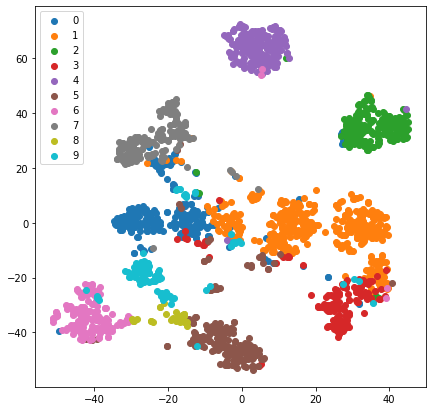

In [45]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred)

Text(0.5, 1.0, 'PCA Clustering')

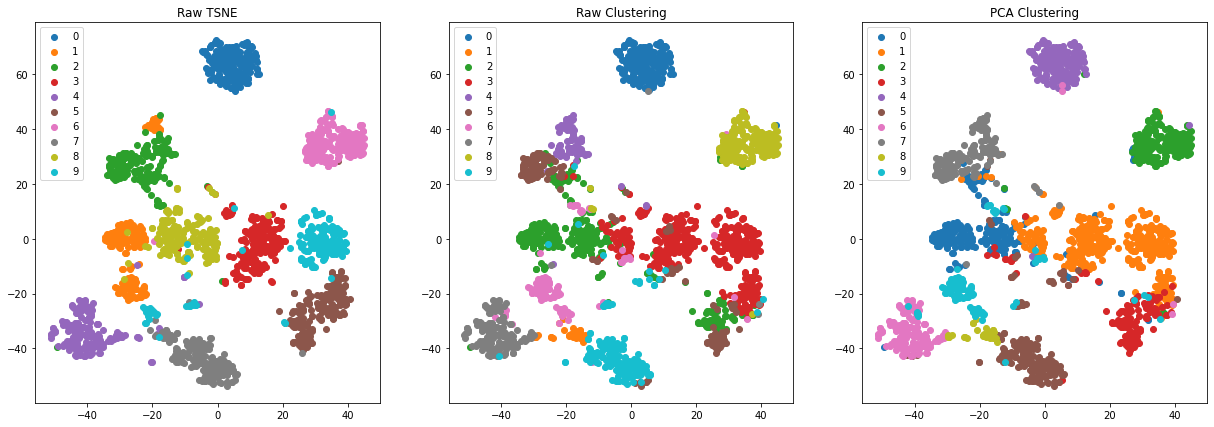

In [46]:
plt.figure(figsize=(21, 7))
plt.subplot(131)
visualize_latent_space_with_label(tsne_latent, target)
plt.title("Raw TSNE")
plt.subplot(132)
visualize_latent_space_with_label(tsne_latent, pred)
plt.title("Raw Clustering")
plt.subplot(133)
visualize_latent_space_with_label(tsne_latent, pca_pred)
plt.title("PCA Clustering")

* 64차원에서 12차원으로 변환
* 차원축소를 안한 경우와 한 경우에 군집이 크게 차이는 없지만 데이터를 12차원으로 줄일 수 있다는 장점이 있으므로 축소를 해야 함

In [47]:
data.shape, pca_data.shape

((1797, 64), (1797, 12))

---

## [ Eigenface를 이용한 차원 축소와 SVM을 이용한 분류 ] 

### 1. Data

#### 1-1. Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

data, target = faces["data"], faces["target"]

In [3]:
n_samples, h, w = faces.images.shape
n_samples, h, w

(1288, 50, 37)

In [4]:
target_names = faces.target_names
n_classes = target_names.shape[0]
n_classes

7

In [5]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

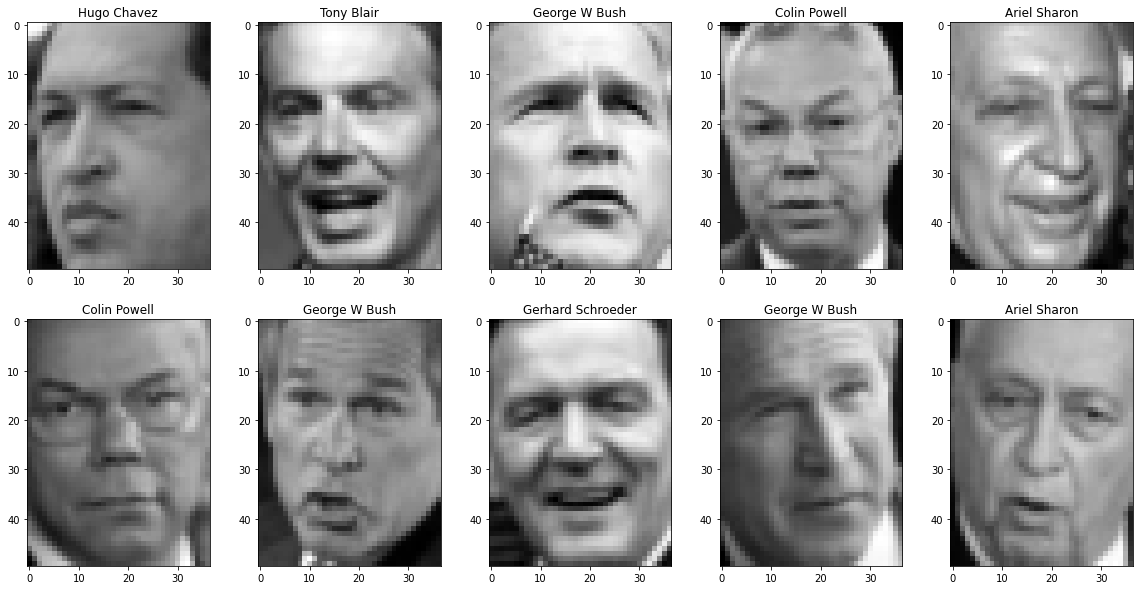

In [6]:
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

#### 1-2. Data Split / Scaling

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.7, random_state=2021)

print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

### 2. Eigenface

* PCA를 이용해 얼굴 사진을 축소하면 생기는 eigenvector가 얼굴 모양과 같다고 하여서 생긴 용어

In [9]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(scaled_train_data)

PCA()

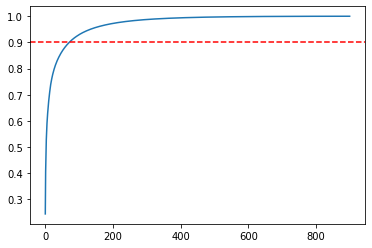

In [10]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(0.9, color="red", linestyle="--")

* explained variance ratio가 0.9가 되는 지점의 component

In [11]:
pca = PCA(n_components=0.9)
pca.fit(scaled_train_data)

PCA(n_components=0.9)

In [12]:
pca_train_data = pca.transform(scaled_train_data)
pca_test_data = pca.transform(scaled_test_data)

In [15]:
pca.components_.shape, pca.n_components_

((72, 1850), 72)

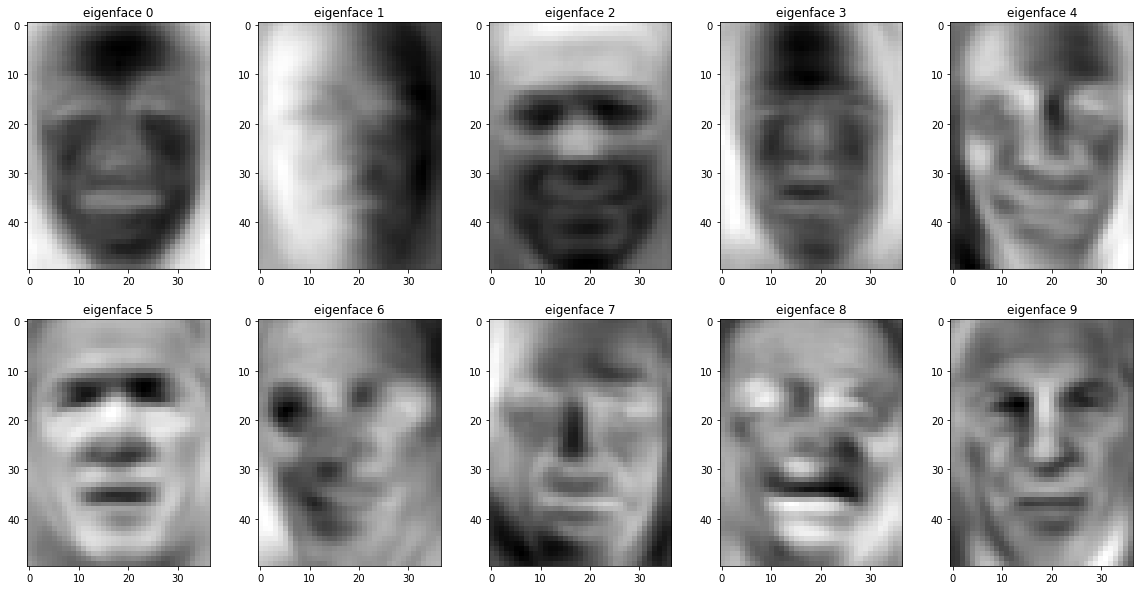

In [14]:
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(f"eigenface {idx}")

### 3. SVM

#### 3-1. 기본 Data

In [23]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(scaled_train_data, train_target)

SVC()

In [25]:
train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

In [26]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [27]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9567
test accuracy is 0.7364


#### 3-1. Eigenface

* 1850->72로 차원 축소

In [28]:
scaled_train_data.shape, pca_train_data.shape

((901, 1850), (901, 72))

In [29]:
eigenface_svm = SVC()
eigenface_svm.fit(pca_train_data, train_target)

SVC()

In [30]:
pca_train_pred = eigenface_svm.predict(pca_train_data)
pca_test_pred = eigenface_svm.predict(pca_test_data)

pca_train_acc = accuracy_score(train_target, pca_train_pred)
pca_test_acc = accuracy_score(test_target, pca_test_pred)

print(f"Eigenface train accuracy is {pca_train_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Eigenface train accuracy is 0.9390
Eigenface test accuracy is 0.7339


In [31]:
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Baseline test accuracy is 0.7364
Eigenface test accuracy is 0.7339
